In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [2]:

# Load the dataset
column_names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
df = pd.read_csv("heart_disease_uci.csv", names=column_names, header=0)


In [3]:

# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)
print("Replaced '?' with NaN:")
print(df.head(), "\n")


Replaced '?' with NaN:
         age        sex               cp  trestbps   chol    fbs  \
1 63    Male  Cleveland   typical angina     145.0  233.0   True   
2 67    Male  Cleveland     asymptomatic     160.0  286.0  False   
3 67    Male  Cleveland     asymptomatic     120.0  229.0  False   
4 37    Male  Cleveland      non-anginal     130.0  250.0  False   
5 41  Female  Cleveland  atypical angina     130.0  204.0  False   

             restecg  thalach  exang  oldpeak        slope   ca  \
1 63  lv hypertrophy    150.0  False      2.3  downsloping  0.0   
2 67  lv hypertrophy    108.0   True      1.5         flat  3.0   
3 67  lv hypertrophy    129.0   True      2.6         flat  2.0   
4 37          normal    187.0  False      3.5  downsloping  0.0   
5 41  lv hypertrophy    172.0  False      1.4    upsloping  0.0   

                   thal  target  
1 63       fixed defect       0  
2 67             normal       2  
3 67  reversable defect       1  
4 37             normal      

In [4]:

# Convert necessary columns to numeric, coercing errors to NaN
for col in ['age', 'trestbps', 'chol', 'thalach', 'ca', 'thal']:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [5]:

# Check for NaN values after conversion
print("NaN values after conversion:")
print(df.isna().sum(), "\n")


NaN values after conversion:
age         920
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalach      55
exang        55
oldpeak      62
slope       309
ca          611
thal        920
target        0
dtype: int64 



In [6]:

# Fill NaN values with the mean of each numeric column
df.fillna(df.select_dtypes(include=[np.number]).mean(), inplace=True)
print("NaN values after filling with mean:")
print(df.isna().sum(), "\n")



NaN values after filling with mean:
age         920
sex           0
cp            0
trestbps      0
chol          0
fbs          90
restecg       2
thalach       0
exang        55
oldpeak       0
slope       309
ca            0
thal        920
target        0
dtype: int64 



In [7]:

# Convert target to binary classification (disease vs. no disease)
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)


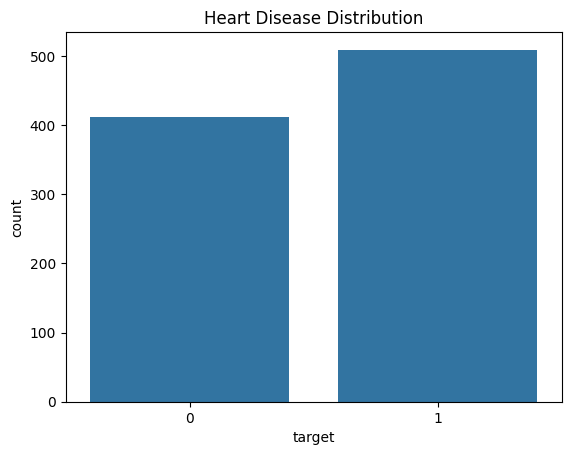

In [8]:

# Visualize the target variable distribution
sns.countplot(x='target', data=df)
plt.title('Heart Disease Distribution')
plt.show()


In [9]:

# Keep only the specified columns for further analysis
df_filtered = df[['age', 'trestbps', 'chol', 'thalach', 'target']]
print("Filtered DataFrame:")
print(df_filtered.head(), "\n")


Filtered DataFrame:
      age  trestbps   chol  thalach  target
1 63  NaN     145.0  233.0    150.0       0
2 67  NaN     160.0  286.0    108.0       1
3 67  NaN     120.0  229.0    129.0       1
4 37  NaN     130.0  250.0    187.0       0
5 41  NaN     130.0  204.0    172.0       0 



In [10]:

# Check for NaN values before normalization
print("NaN values before normalization:")
print(df_filtered.isna().sum(), "\n")


NaN values before normalization:
age         920
trestbps      0
chol          0
thalach       0
target        0
dtype: int64 



In [11]:
# Normalize only the specified numeric features
numeric_features = ['age', 'trestbps', 'chol', 'thalach']
scaler = StandardScaler()
df_filtered.loc[:, numeric_features] = scaler.fit_transform(df_filtered[numeric_features])
print("DataFrame after normalization:")
print(df_filtered.head(), "\n")

DataFrame after normalization:
      age  trestbps      chol   thalach  target
1 63  NaN  0.698041  0.311021  0.495698       0
2 67  NaN  1.511761  0.797713 -1.175955       1
3 67  NaN -0.658158  0.274289 -0.340128       1
4 37  NaN -0.115679  0.467130  1.968345       0
5 41  NaN -0.115679  0.044717  1.371326       0 



C:\Users\parth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\parth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\parth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


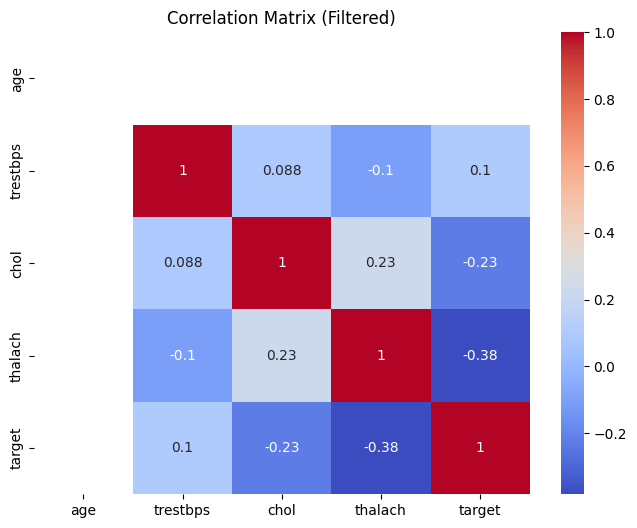

In [12]:
# Visualizing the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df_filtered.corr(), annot=True, cmap="coolwarm")
plt.title('Correlation Matrix (Filtered)')
plt.show()